
#### Teoría de Circuitos II

#  Tarea Semanal 8

#### Autor: Federico Rodriguez Vizzon
<img src="./assets/ned.jpeg" align="left" width="150" /> 


# Ejercicio 2 de la guia de TP5

## Filtro pasabajos digital que emula la caractestirica de un filtro Butterworth analogico de orden 2 con $f_c = 1 Khz$ 

### Ecuacion de un filtro Butterworth de orden 2

$H(s) = \frac{\omega_0^2}{s^2 + s\frac{\omega_0}{Q} + \omega_0^2}$ 

$\omega_0 = 2\pi f_c$

$Q = \frac{1}{\sqrt{2}}$

### Transformada bilineal

$s = k \frac{z-1}{z+1} $

$k = 2f_s$ 

Aplicamos la transformada bilineal a $H(s)$ para obtener $H(z)$

$H(s = k \frac{z-1}{z+1}) = H(z) = \frac{\omega_0^2}{k^2{\frac{z-1}{z+1}}^2 + k\frac{z-1}{z+1}\frac{\omega_0}{Q} + \omega_0^2} = \frac{\left(z^2 + 2z + 1\right)\omega_0^2}{k^2\left(z^2-2z+1\right) + \frac{\omega_0}{Q}k\left(z^2-1\right) + \omega_0^2\left(z^2+2z+1\right)}$ 

Obtenemos Modulo y fase de $H(z)$

$H(z = e^{j\Omega}) = H(e^{j\Omega}) = \frac{\left(e^{j2\Omega} + 2e^{j\Omega} + e^{j0}\right)\omega_0^2}{k^2\left(e^{j2\Omega}-2e^{j\Omega}+e^{j0}\right) + \frac{\omega_0}{Q}k\left(e^{j2\Omega}-e^{j0}\right) + \omega_0^2\left(e^{j2\Omega}+2e^{j\Omega}+e^{j0}\right)} = \frac{\left(e^{j\Omega} + 2 + e^{-j\Omega}\right) e^{j\Omega}\omega_0^2}{k^2e^{j\Omega}\left(e^{j\Omega}-2+e^{-j\Omega}\right) + \frac{\omega_0e^{j\Omega}}{Q}k\left(e^{j\Omega}-e^{-j\Omega}\right) + \omega_0^2e^{j\Omega}\left(e^{j\Omega}+2+e^{-j\Omega}\right)} =  \frac{\left(e^{j\Omega} + 2 + e^{-j\Omega}\right)\omega_0^2}{k^2\left(e^{j\Omega}-2+e^{-j\Omega}\right) + \frac{\omega_0}{Q}k\left(e^{j\Omega}-e^{-j\Omega}\right) + \omega_0^2\left(e^{j\Omega}+2+e^{-j\Omega}\right)}$ 

Reemplazando por senos y cosenos

$H(e^{J\Omega} = \frac{2\omega_0^2\left(1+\cos{\Omega}\right)}{2k^2\left(-1+\cos{\Omega}\right)+ j2\frac{\omega_0k}{Q}\sin{\Omega} + 2\omega_0^2\left(1+\cos{\Omega}\right)}$

### Simulacion Numerica

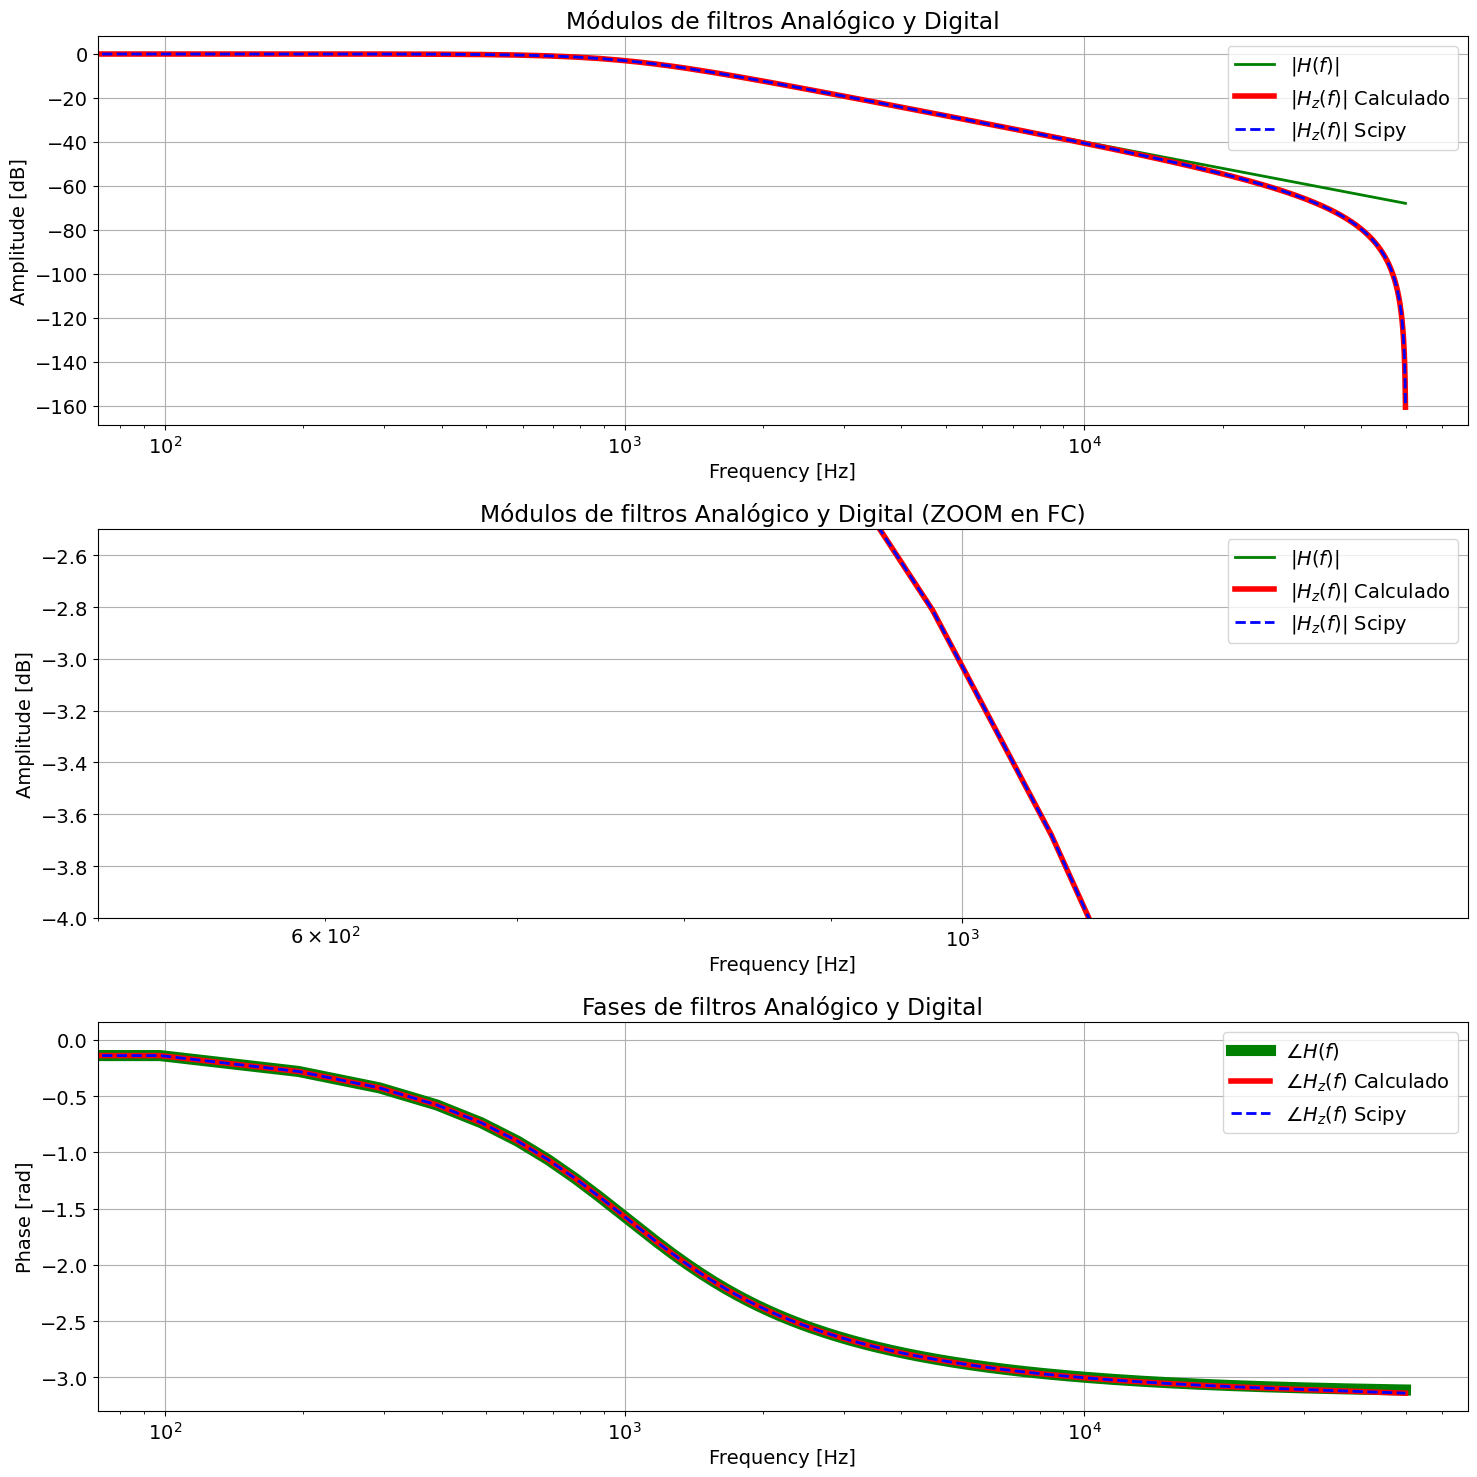

In [7]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import control


plt.rcParams.update({'font.size': 14})

# Filtro pasa bajos
fc_1 = 1e3
w0_1 = 2*np.pi*fc_1
w00_1 = w0_1**2

# Condiciones de muestro
fs_1 = 100e3
k_1 = 2*fs_1

# H(Z) obtenida en forma analitca
num_z_calc_1 = [w00_1, 2*w00_1, w00_1]
den_z_calc_1 = [k_1**2+np.sqrt(2)*k_1*w0_1+w00_1, 2*w00_1-2*k_1**2, k_1**2+w00_1-np.sqrt(2)*k_1*w0_1]

# Respuesta en frecuencia de H(z)
wz_calc, hz_calc = sig.freqz(num_z_calc_1, den_z_calc_1)

#Obtengo transferencia de butterworth pasabajos de 2°orden
num, den = sig.butter(2, w0_1, btype='low', analog=True, output='ba')

# Respuesta en frequencia del filtro Analogico.
ws, hs = sig.freqs(num,den, wz_calc*fs_1)

#Para verificar los coeficientes calculados analíticamente, calculo la bilineal con scipy
numz, denz = sig.bilinear(num, den, fs_1)

wz, hz = sig.freqz(numz, denz)

fig, ax = plt.subplots(3,1,figsize=(15, 15))
ax[0].set_title('Módulos de filtros Analógico y Digital')
# Modulo de la respuesta analogica de un butt orden 2
ax[0].semilogx(ws/(2*np.pi), 20 * np.log10(abs(hs)),'g',linewidth=2.0, label=r'$|H(f)|$')
# Modulo de la respuesta Digital del desarrollo en lapiz y papel
ax[0].semilogx(wz_calc*fs_1/(2*np.pi), 20 * np.log10(abs(hz_calc)),'r',linewidth=4.0, label = r'$|H_z(f)|$ Calculado')
# Modulo de la bilineal aplicada por scipi
ax[0].semilogx(wz*fs_1/(2*np.pi), 20 * np.log10(abs(hz)), 'b--',linewidth=2.0, label = r'$|H_z(f)|$ Scipy')
ax[0].set_ylabel('Amplitude [dB]')
ax[0].set_xlabel('Frequency [Hz]')
ax[0].legend()
ax[0].grid()

ax[1].set_title('Módulos de filtros Analógico y Digital (ZOOM en FC)')
# Modulo de la respuesta analogica de un butt orden 2
ax[1].semilogx(ws/(2*np.pi), 20 * np.log10(abs(hs)),'g',linewidth=2.0, label=r'$|H(f)|$')
# Modulo de la respuesta Digital del desarrollo en lapiz y papel
ax[1].semilogx(wz_calc*fs_1/(2*np.pi), 20 * np.log10(abs(hz_calc)),'r',linewidth=4.0, label = r'$|H_z(f)|$ Calculado')
# Modulo de la bilineal aplicada por scipi
ax[1].semilogx(wz*fs_1/(2*np.pi), 20 * np.log10(abs(hz)), 'b--',linewidth=2.0, label = r'$|H_z(f)|$ Scipy')
ax[1].set_ylabel('Amplitude [dB]')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_xlim([500, 1500])
ax[1].set_ylim([-4, -2.5])
ax[1].legend()
ax[1].grid()

ax[2].set_title('Fases de filtros Analógico y Digital')
ax[2].semilogx(ws/(2*np.pi), np.angle(hs),'g',linewidth=8.0, label=r'$∠H(f)$')
ax[2].semilogx(wz_calc*fs_1/(2*np.pi), np.angle(hz_calc), 'r',linewidth=4.0, label = r'$∠H_z(f)$ Calculado')
ax[2].semilogx(wz*fs_1/(2*np.pi), np.angle(hz), 'b--',linewidth=2.0, label = r'$∠H_z(f)$ Scipy')
ax[2].set_ylabel('Phase [rad]')
ax[2].set_xlabel('Frequency [Hz]')
ax[2].legend()
ax[2].grid()

plt.tight_layout()


En la banda de paso del filtro no se observan distorsiones ni desvios respecto de la transferencia analogica que se desea emular.

### Simulacion numerica para $f_s = 10KHz$

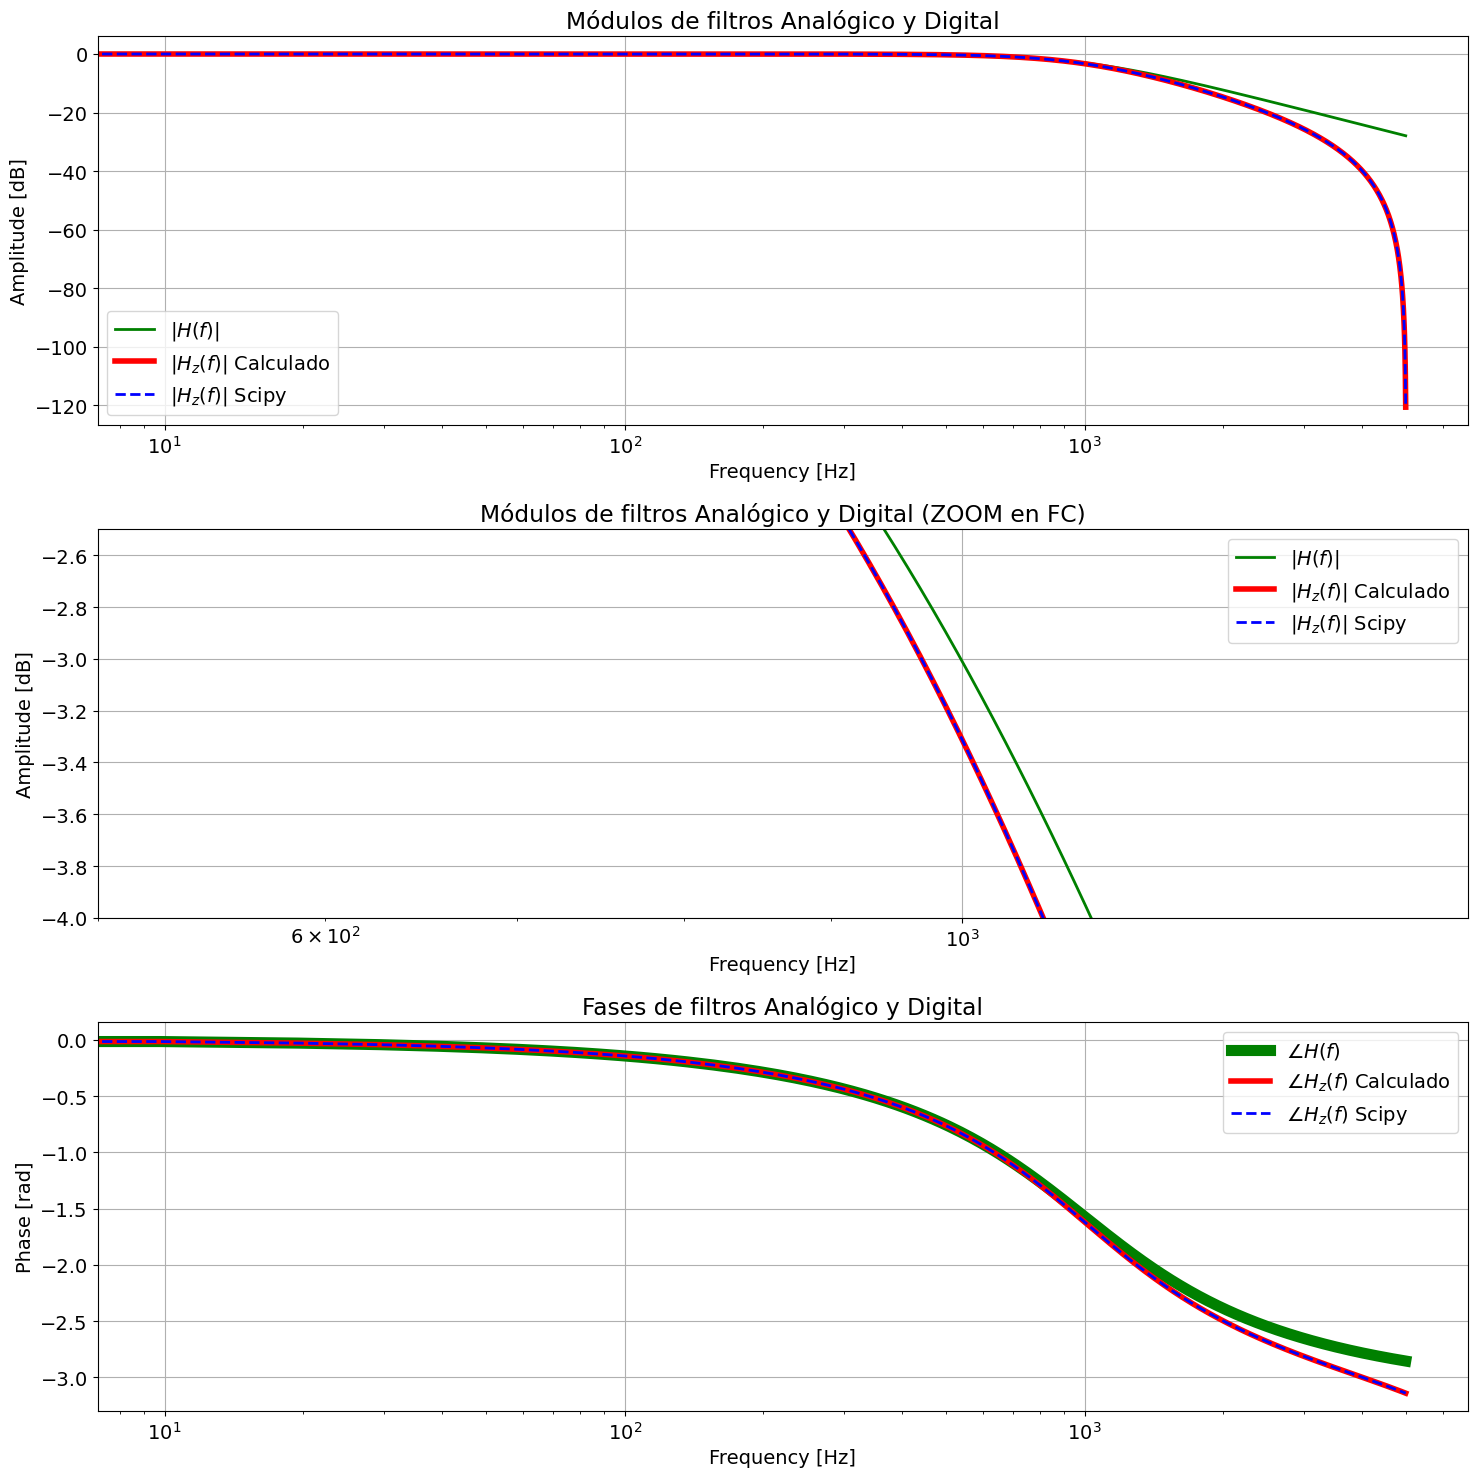

In [8]:
# Condiciones de muestro
fs_2 = 10e3
k_2 = 2*fs_2

# H(Z) obtenida en forma analitca
num_z_calc_2 = [w00_1, 2*w00_1, w00_1]
den_z_calc_2 = [k_2**2+np.sqrt(2)*k_2*w0_1+w00_1, 2*w00_1-2*k_2**2, k_2**2+w00_1-np.sqrt(2)*k_2*w0_1]

# Respuesta en frecuencia de H(z)
wz_calc_2, hz_calc_2 = sig.freqz(num_z_calc_2, den_z_calc_2)

#Obtengo transferencia de butterworth pasabajos de 2°orden
num, den = sig.butter(2, w0_1, btype='low', analog=True, output='ba')

# Respuesta en frequencia del filtro Analogico.
ws_2, hs_2 = sig.freqs(num,den, wz_calc_2*fs_2)

#Para verificar los coeficientes calculados analíticamente, calculo la bilineal con scipy
numz_2, denz_2 = sig.bilinear(num, den, fs_2)

wz_2, hz_2 = sig.freqz(numz_2, denz_2)

fig_2, ax_2 = plt.subplots(3,1,figsize=(15, 15))
ax_2[0].set_title('Módulos de filtros Analógico y Digital')
# Modulo de la respuesta analogica de un butt orden 2
ax_2[0].semilogx(ws_2/(2*np.pi), 20 * np.log10(abs(hs_2)),'g',linewidth=2.0, label=r'$|H(f)|$')
# Modulo de la respuesta Digital del desarrollo en lapiz y papel
ax_2[0].semilogx(wz_calc_2*fs_2/(2*np.pi), 20 * np.log10(abs(hz_calc_2)),'r',linewidth=4.0, label = r'$|H_z(f)|$ Calculado')
# Modulo de la bilineal aplicada por scipi
ax_2[0].semilogx(wz_2*fs_2/(2*np.pi), 20 * np.log10(abs(hz_2)), 'b--',linewidth=2.0, label = r'$|H_z(f)|$ Scipy')
ax_2[0].set_ylabel('Amplitude [dB]')
ax_2[0].set_xlabel('Frequency [Hz]')
ax_2[0].legend()
ax_2[0].grid()

ax_2[1].set_title('Módulos de filtros Analógico y Digital (ZOOM en FC)')
# Modulo de la respuesta analogica de un butt orden 2
ax_2[1].semilogx(ws_2/(2*np.pi), 20 * np.log10(abs(hs_2)),'g',linewidth=2.0, label=r'$|H(f)|$')
# Modulo de la respuesta Digital del desarrollo en lapiz y papel
ax_2[1].semilogx(wz_calc_2*fs_2/(2*np.pi), 20 * np.log10(abs(hz_calc_2)),'r',linewidth=4.0, label = r'$|H_z(f)|$ Calculado')
# Modulo de la bilineal aplicada por scipi
ax_2[1].semilogx(wz_2*fs_2/(2*np.pi), 20 * np.log10(abs(hz_2)), 'b--',linewidth=2.0, label = r'$|H_z(f)|$ Scipy')
ax_2[1].set_ylabel('Amplitude [dB]')
ax_2[1].set_xlabel('Frequency [Hz]')
ax_2[1].set_xlim([500, 1500])
ax_2[1].set_ylim([-4, -2.5])
ax_2[1].legend()
ax_2[1].grid()

ax_2[2].set_title('Fases de filtros Analógico y Digital')
ax_2[2].semilogx(ws_2/(2*np.pi), np.angle(hs_2),'g',linewidth=8.0, label=r'$∠H(f)$')
ax_2[2].semilogx(wz_calc_2*fs_2/(2*np.pi), np.angle(hz_calc_2), 'r',linewidth=4.0, label = r'$∠H_z(f)$ Calculado')
ax_2[2].semilogx(wz_2*fs_2/(2*np.pi), np.angle(hz_2), 'b--',linewidth=2.0, label = r'$∠H_z(f)$ Scipy')
ax_2[2].set_ylabel('Phase [rad]')
ax_2[2].set_xlabel('Frequency [Hz]')
ax_2[2].legend()
ax_2[2].grid()
plt.tight_layout()


A simple vista no pareciera haber diferencias entre $f_s = 10kHz$ y $f_s = 100KHz$ pero al hacer zoom en el punto $f_c$ podemos observar que el filtro digital esta atenuando aproximadamente $0.4dB$ en exceso.

## Filtro pasa alto con $f_c = 6kHz$

$H_{lp}(s) = \frac{\omega_0^2}{s^2 + s\frac{\omega_0}{Q} + \omega_0^2}$

Aplicando el nucleo de transformacion $s = \frac{1}{S}$ 

$H_hp(S) = \frac{\omega_0^2 S^2}{1 + S\frac{\omega_0}{Q} + S^2\omega_0^2}$

Aplicamos la transformada bilineal

$S = k \frac{z-1}{z+1}$

$H(z) = \frac{\omega_0^2 \left(k \frac{z-1}{z+1}\right)^2}{1 +  k \frac{z-1}{z+1}\frac{\omega_0}{Q} + \left(k \frac{z-1}{z+1}\right)^2\omega_0^2}$

Definimos $k^* = k\omega_0$

$H(z) = \frac{{k^*}^2 \left(\frac{z-1}{z+1}\right)^2}{1 + \frac{z-1}{z+1}\frac{k^*}{Q} + {k^*}^2\left(\frac{z-1}{z+1}\right)^2\omega_0^2} = \frac{{k^*}^2\left(z^2-2z+1\right)}{\left(z^2+2z+1\right) \frac{k^*}{Q}\left(z^2-1\right)+{k^*}^2\left(z^2-2z+1\right)}$

### Simulacion Numerica para $fs = 100Khz$ 


/var/folders/s1/nhx8_62d77z026c6gbcpqwyw0000gn/T/ipykernel_9742/844865115.py:22: RuntimeWarning: divide by zero encountered in log10
  ax_hp_1[0].semilogx(ws_hp_1/(2*np.pi), 20*np.log10(abs(hs_hp_1)),'g',linewidth=2.0, label=r'$|H(f)|$')
/var/folders/s1/nhx8_62d77z026c6gbcpqwyw0000gn/T/ipykernel_9742/844865115.py:24: RuntimeWarning: divide by zero encountered in log10
  ax_hp_1[0].semilogx(wz_hp_1*fs_1/(2*np.pi), 20*np.log10(abs(hz_hp_1)),'r',linewidth=4.0, label = r'$|H_z(f)|$ Calculado')
/var/folders/s1/nhx8_62d77z026c6gbcpqwyw0000gn/T/ipykernel_9742/844865115.py:33: RuntimeWarning: divide by zero encountered in log10
  ax_hp_1[1].semilogx(ws_hp_1/(2*np.pi), 20*np.log10(abs(hs_hp_1)),'g',linewidth=2.0, label=r'$|H(f)|$')
/var/folders/s1/nhx8_62d77z026c6gbcpqwyw0000gn/T/ipykernel_9742/844865115.py:34: RuntimeWarning: divide by zero encountered in log10
  ax_hp_1[1].semilogx(wz_hp_1*fs_1/(2*np.pi), 20*np.log10(abs(hz_hp_1)),'r',linewidth=4.0, label = r'$|H_z(f)|$ Calculado')


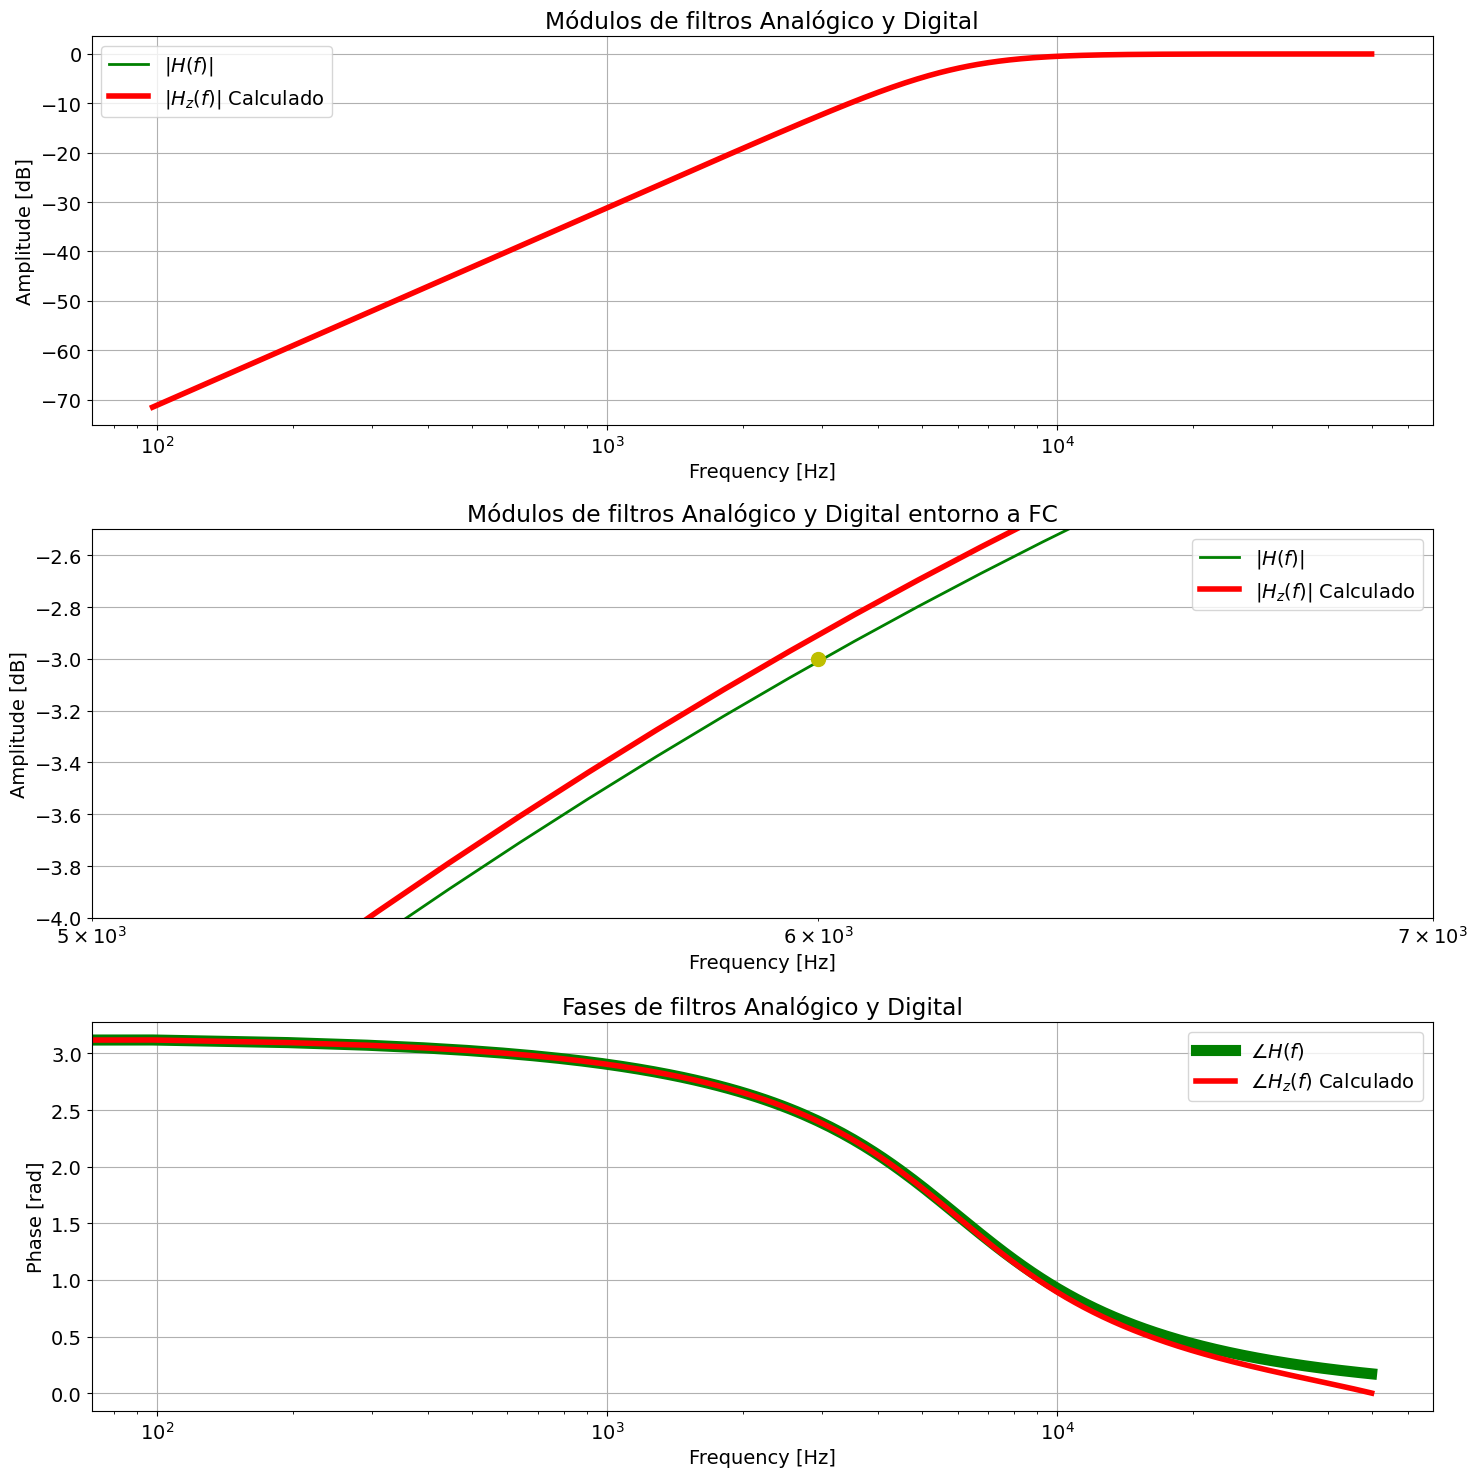

In [12]:
# H(Z) obtenida en forma analitca
w0_hp = 2*np.pi*6e3
w00_hp = w0_hp**2 
k_hp_1 = 2*fs_1/w0_hp
kk_hp_1 = k_hp_1**2
num_z_hp_calc_fs_1 = [kk_hp_1, -2*kk_hp_1, kk_hp_1]
den_z_hp_calc_fs_1 = [1+kk_hp_1+k_hp_1*np.sqrt(2), 
                      2-2*kk_hp_1,
                      1-k_hp_1*np.sqrt(2)+kk_hp_1]

# Respuesta en frecuencia de H(z)
wz_hp_1, hz_hp_1 = sig.freqz(num_z_hp_calc_fs_1, den_z_hp_calc_fs_1)

#Obtengo transferencia de butterworth pasabajos de 2°orden
num, den = sig.butter(2, w0_hp, btype='highpass', analog=True, output='ba')

# Respuesta en frequencia del filtro Analogico.
ws_hp_1, hs_hp_1 = sig.freqs(num, den, wz_hp_1*fs_1)

fig_hp_1, ax_hp_1 = plt.subplots(3,1,figsize=(15, 15))
ax_hp_1[0].set_title('Módulos de filtros Analógico y Digital')
ax_hp_1[0].semilogx(ws_hp_1/(2*np.pi), 20*np.log10(abs(hs_hp_1)),'g',linewidth=2.0, label=r'$|H(f)|$')
# Modulo de la respuesta Digital del desarrollo en lapiz y papel
ax_hp_1[0].semilogx(wz_hp_1*fs_1/(2*np.pi), 20*np.log10(abs(hz_hp_1)),'r',linewidth=4.0, label = r'$|H_z(f)|$ Calculado')
# Modulo de la bilineal aplicada por scipi
# ax_hp_1[0].semilogx(wz*fs_1/(2*np.pi), 20 * np.log10(abs(hz)), 'b--',linewidth=2.0, label = r'$|H_z(f)|$ Scipy')
ax_hp_1[0].set_ylabel('Amplitude [dB]')
ax_hp_1[0].set_xlabel('Frequency [Hz]')
ax_hp_1[0].legend()
ax_hp_1[0].grid()

ax_hp_1[1].set_title('Módulos de filtros Analógico y Digital entorno a FC')
ax_hp_1[1].semilogx(ws_hp_1/(2*np.pi), 20*np.log10(abs(hs_hp_1)),'g',linewidth=2.0, label=r'$|H(f)|$')
ax_hp_1[1].semilogx(wz_hp_1*fs_1/(2*np.pi), 20*np.log10(abs(hz_hp_1)),'r',linewidth=4.0, label = r'$|H_z(f)|$ Calculado')
# Modulo de la bilineal aplicada por scipi
# ax_hp_1[0].semilogx(wz*fs_1/(2*np.pi), 20 * np.log10(abs(hz)), 'b--',linewidth=2.0, label = r'$|H_z(f)|$ Scipy')
ax_hp_1[1].set_ylabel('Amplitude [dB]')
ax_hp_1[1].set_xlabel('Frequency [Hz]')
ax_hp_1[1].set_xlim([5e3, 7e3])
ax_hp_1[1].set_ylim([-4, -2.5])

ax_hp_1[1].plot(6000,-3,'yo', markersize = 10)
ax_hp_1[1].legend()
ax_hp_1[1].grid()

ax_hp_1[2].set_title('Fases de filtros Analógico y Digital')
ax_hp_1[2].semilogx(ws_hp_1/(2*np.pi), np.angle(hs_hp_1),'g',linewidth=8.0, label=r'$∠H(f)$')
ax_hp_1[2].semilogx(wz_hp_1*fs_1/(2*np.pi), np.angle(hz_hp_1), 'r',linewidth=4.0, label = r'$∠H_z(f)$ Calculado')
ax_hp_1[2].set_ylabel('Phase [rad]')
ax_hp_1[2].set_xlabel('Frequency [Hz]')
ax_hp_1[2].legend()
ax_hp_1[2].grid()
plt.tight_layout()

En este caso recomendaria aplicar prewarping ya que el filtro digital no llega a cumplir con el valor de 3db para $f_c = 6kHz$

### Simulacion Numerica para $fs = 10Khz$ 

Antes de correr la simulacion ya debemos desconfiar de los resultados que vamos a obtener por que no estamos cumpliendo con Nyquist.

/var/folders/s1/nhx8_62d77z026c6gbcpqwyw0000gn/T/ipykernel_9742/1023233682.py:20: RuntimeWarning: divide by zero encountered in log10
  ax_hp_2[0].semilogx(ws_hp_2/(2*np.pi), 20*np.log10(abs(hs_hp_2)),'g',linewidth=2.0, label=r'$|H(f)|$')
/var/folders/s1/nhx8_62d77z026c6gbcpqwyw0000gn/T/ipykernel_9742/1023233682.py:22: RuntimeWarning: divide by zero encountered in log10
  ax_hp_1[0].semilogx(wz_hp_2*fs_2/(2*np.pi), 20*np.log10(abs(hz_hp_2)),'r',linewidth=4.0, label = r'$|H_z(f)|$ Calculado')


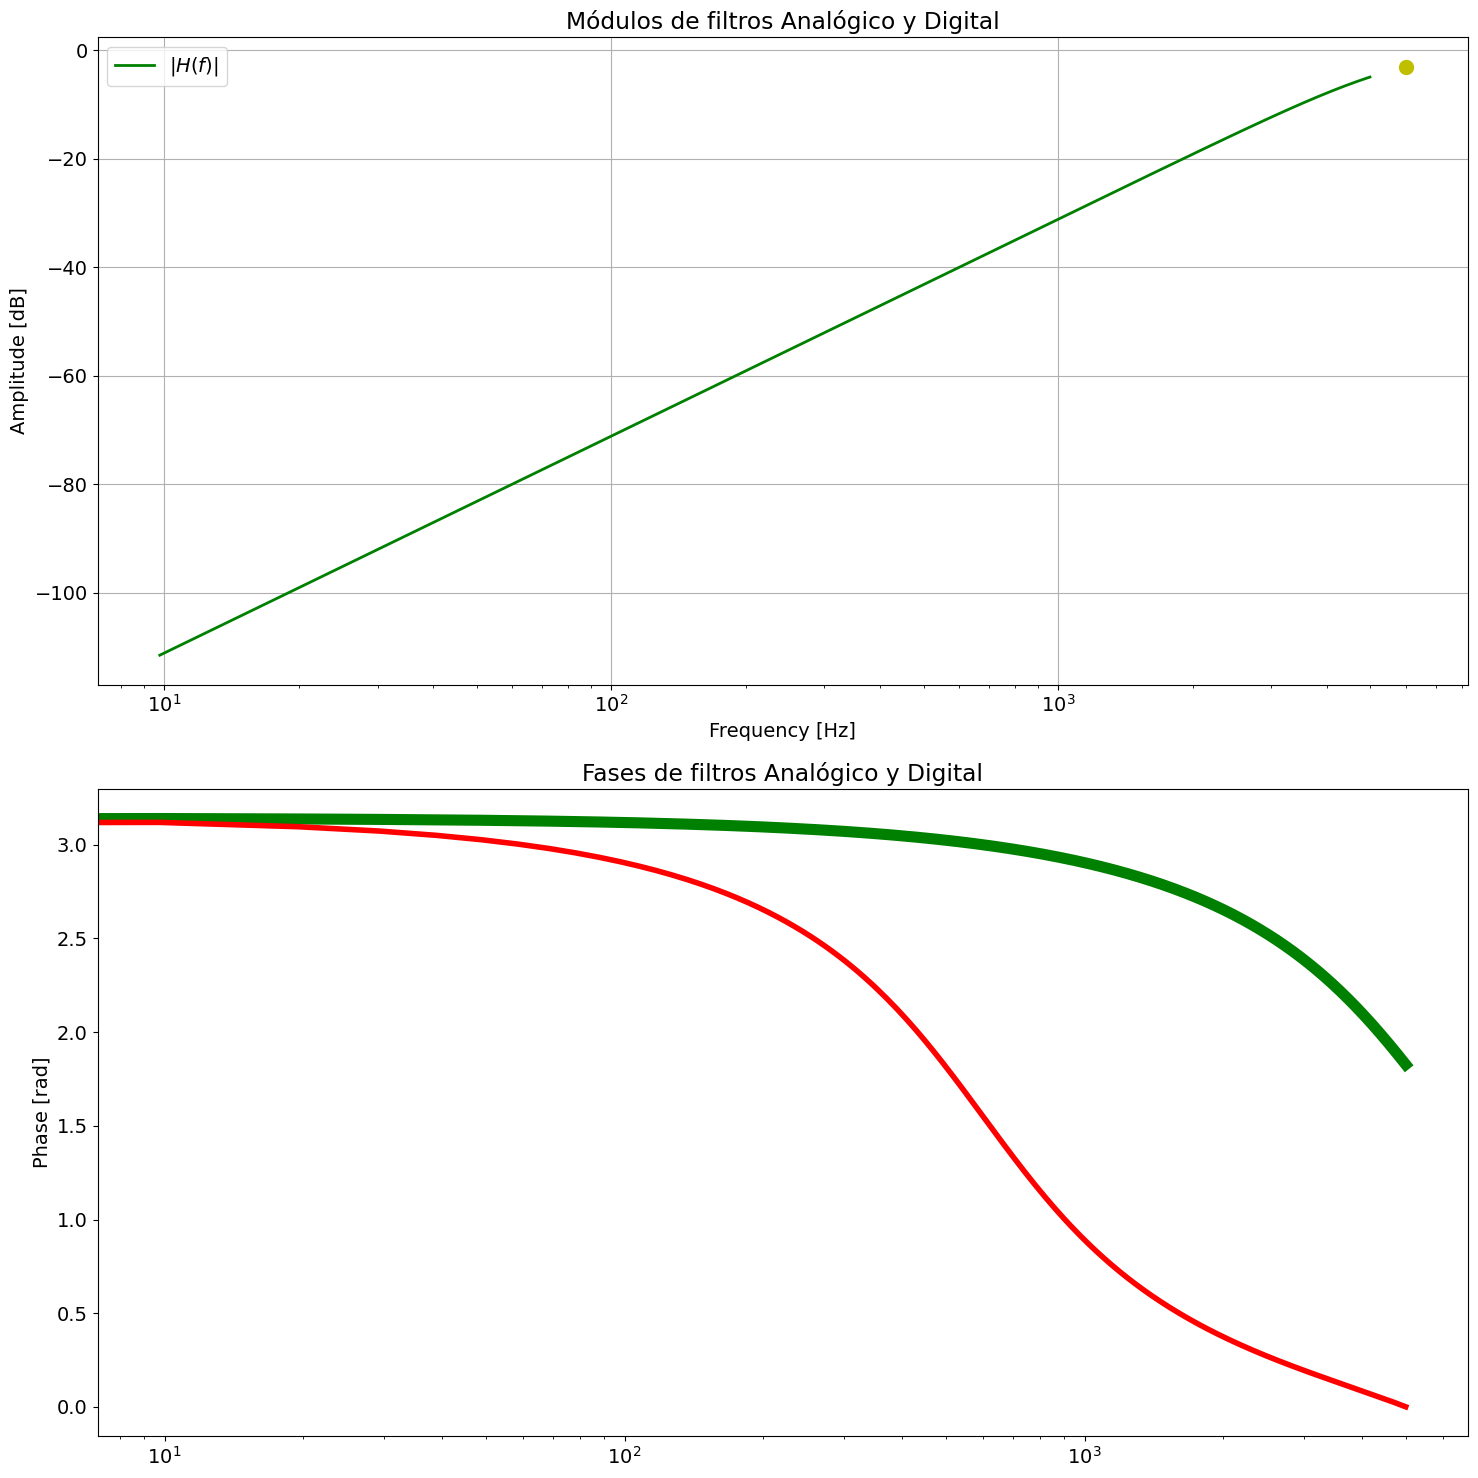

In [35]:
# H(Z) obtenida en forma analitca
k_hp_2 = 2*fs_1/w0_hp
kk_hp_2 = k_hp_1**2
num_z_hp_calc_fs_2 = [kk_hp_2, -2*kk_hp_2, kk_hp_2]
den_z_hp_calc_fs_2 = [1+kk_hp_2+k_hp_2*np.sqrt(2), 
                      2-2*kk_hp_2,
                      1-k_hp_2*np.sqrt(2)+kk_hp_2]

# Respuesta en frecuencia de H(z)
wz_hp_2, hz_hp_2 = sig.freqz(num_z_hp_calc_fs_2, den_z_hp_calc_fs_2)

#Obtengo transferencia de butterworth pasabajos de 2°orden
num, den = sig.butter(2, w0_hp, btype='highpass', analog=True, output='ba')

# Respuesta en frequencia del filtro Analogico.
ws_hp_1, hs_hp_2 = sig.freqs(num, den, wz_hp_2*fs_2)

fig_hp_2, ax_hp_2 = plt.subplots(2,1,figsize=(15, 15))
ax_hp_2[0].set_title('Módulos de filtros Analógico y Digital')
ax_hp_2[0].semilogx(ws_hp_2/(2*np.pi), 20*np.log10(abs(hs_hp_2)),'g',linewidth=2.0, label=r'$|H(f)|$')
# Modulo de la respuesta Digital del desarrollo en lapiz y papel
ax_hp_1[0].semilogx(wz_hp_2*fs_2/(2*np.pi), 20*np.log10(abs(hz_hp_2)),'r',linewidth=4.0, label = r'$|H_z(f)|$ Calculado')
# Modulo de la bilineal aplicada por scipi
# ax_hp_1[0].semilogx(wz*fs_1/(2*np.pi), 20 * np.log10(abs(hz)), 'b--',linewidth=2.0, label = r'$|H_z(f)|$ Scipy')
ax_hp_2[0].plot(6000,-3,'yo', markersize = 10)
ax_hp_2[0].set_ylabel('Amplitude [dB]')
ax_hp_2[0].set_xlabel('Frequency [Hz]')
ax_hp_2[0].legend()
ax_hp_2[0].grid()

ax_hp_2[1].set_title('Fases de filtros Analógico y Digital')
ax_hp_2[1].semilogx(ws_hp_2/(2*np.pi), np.angle(hs_hp_2),'g',linewidth=8.0, label=r'$∠H(f)$')
ax_hp_2[1].semilogx(wz_hp_2*fs_2/(2*np.pi), np.angle(hz_hp_2), 'r',linewidth=4.0, label = r'$∠H_z(f)$ Calculado')
ax_hp_2[1].set_ylabel('Phase [rad]')
ax_hp_1[1].set_xlabel('Frequency [Hz]')
ax_hp_1[1].legend()
ax_hp_1[1].grid()
plt.tight_layout()

Se deberia aplicar prewarping ya que la zona de interes esta muy proxima a la frecuencia de muestreo y hay distorsion.

# Ejercicio 3-a de la guia de TP5

## Filtro de media movil

$h_1(k)= (1,1)$

$y[0] = x[0]h[0]$

$y[1] = x[1]h[0] + x[0]h[1]$

$y[1] = x[1] + x[n-1]$

$Y(z) = X(z)(1+z^{-1})$

$H_1(Z) = 1+z^{-1} = \frac{z + 1}{z}$

<img src="./assets/sch_1.png" align="center" width="300" /> 

Si dividimos por la cantidad de valores acumulados, obtenemos la media aritmetica.

<img src="./assets/sch_2.png" align="center" width="300" /> 


$h_2(k)= (1,1,1)$

$y[0] = x[0]h[0]$

$y[1] = x[1]h[0] + x[0]h[1]$

$y[2] = x[2]h[0] + x[1]h[1] + x[0]h[2]$

$y[1] = x[1] + x[n-1] + x[n-2]$

$Y(z) = X(z)(1+z^{-1}+z^{-2})$

$H_2(Z) = 1+z^{-1} + z^{-2} = \frac{z^2 + z + 1}{z^2}$

<img src="./assets/sch_3.png" align="center" width="300" /> 

Ahora obtenemos $H(\Omega)$

$H(z = e^{j\Omega}) = H(\Omega) = e^{-j2\Omega} + e^{-j\Omega} + e^{j0} = e^{j\Omega}\left(1+2cos{\Omega}\right) $

Obtenemos el modulo

$\mid H(\Omega)\mid = \mid 1 + 2cos{\Omega} \mid$ 

Para anular una frecuencia de 50Hz primero debemos saber en que punto la transferencia se hace cero

$0 = 1 + 2cos{\Omega} \implies \frac{-1}{2} = cos{\Omega} \implies \Omega = \pi \frac{2}{3}$

Recordando que 

$\Omega = \frac{\omega}{f_s}$

$ \pi \frac{2}{3} = \frac{\omega}{f_s} = \frac{2\pi 50}{fs} \implies f_s = 150Hz$

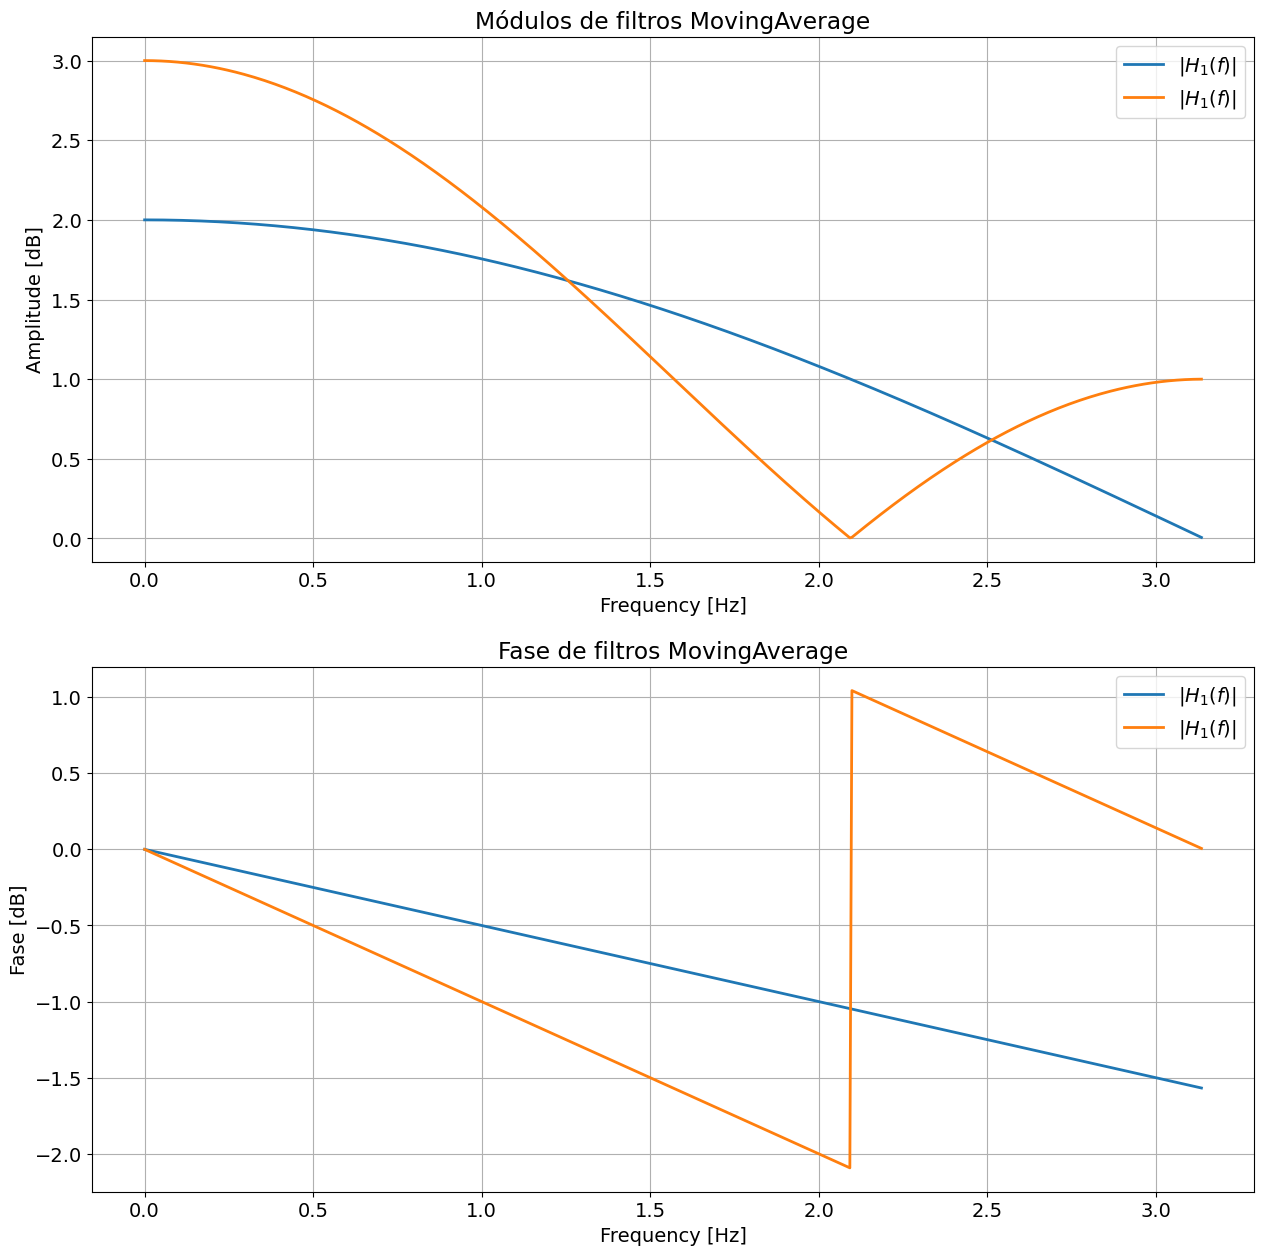

In [24]:
# Ejercicio Numero 3
num_z_moving_average_1 = [1, 1]
den_z_moving_average_1 = [1, 0]
wz_mv_1, hz_mv_1 = sig.freqz(num_z_moving_average_1, den_z_moving_average_1)
num_z_moving_average_2 = [1, 1, 1]
den_z_moving_average_2 = [1, 0, 0]
wz_mv_2, hz_mv_2 = sig.freqz(num_z_moving_average_2, den_z_moving_average_2)

fig_mv, ax_mv = plt.subplots(2,1,figsize=(15, 15))
ax_mv[0].set_title('Módulos de filtros MovingAverage')
ax_mv[0].plot(wz_mv_1, (abs(hz_mv_1)), linewidth=2.0, label = r'$|H_1(f)|$')
ax_mv[0].plot(wz_mv_2, (abs(hz_mv_2)), linewidth=2.0, label = r'$|H_1(f)|$')
ax_mv[0].set_ylabel('Amplitude [dB]')
ax_mv[0].set_xlabel('Frequency [Hz]')
ax_mv[0].legend()
ax_mv[0].grid()

ax_mv[1].set_title('Fase de filtros MovingAverage')
ax_mv[1].plot(wz_mv_1, (np.angle(hz_mv_1)), linewidth=2.0, label = r'$|H_1(f)|$')
ax_mv[1].plot(wz_mv_2, (np.angle(hz_mv_2)), linewidth=2.0, label = r'$|H_1(f)|$')
ax_mv[1].set_ylabel('Fase [dB]')
ax_mv[1].set_xlabel('Frequency [Hz]')
ax_mv[1].legend()
ax_mv[1].grid()

(-1.5, 1.5)

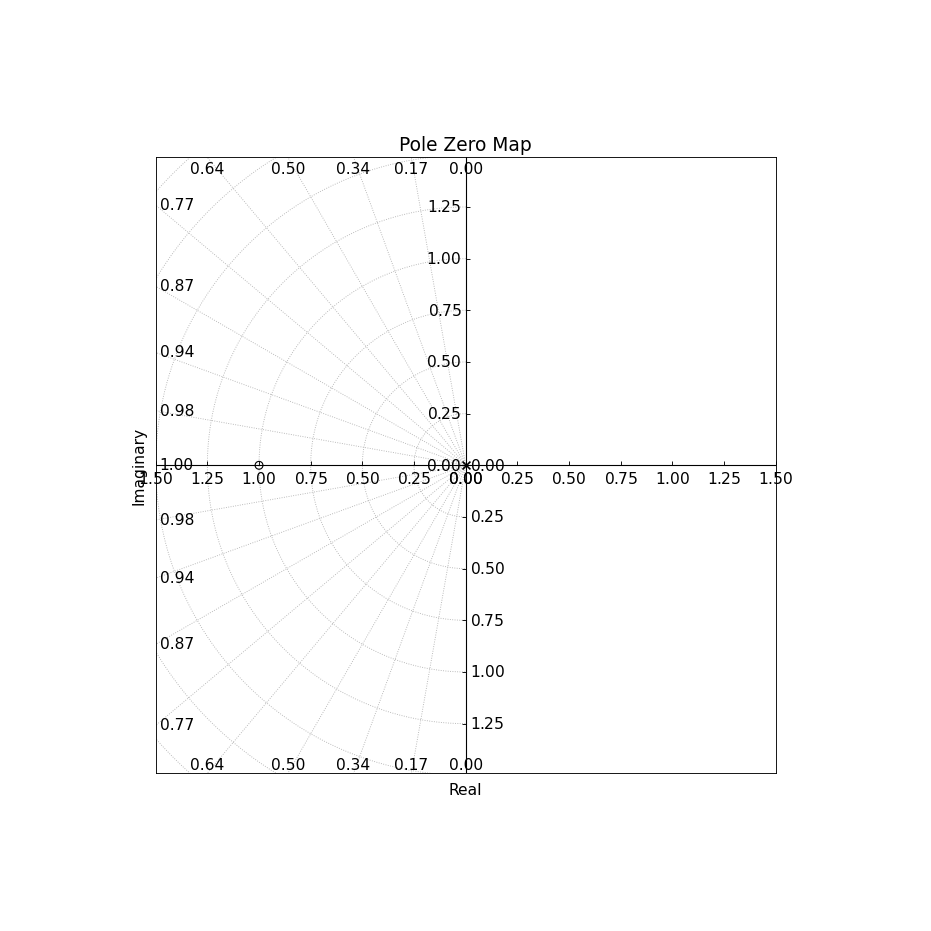

In [25]:
# Singularidades de h1
plt.figure(figsize=(10, 10), dpi=80)
control.pzmap(control.TransferFunction(num_z_moving_average_1, den_z_moving_average_1), grid = True)
plt.gca().set_xlim([-1.5,1.5])
plt.gca().set_ylim([-1.5,1.5])

(-1.5, 1.5)

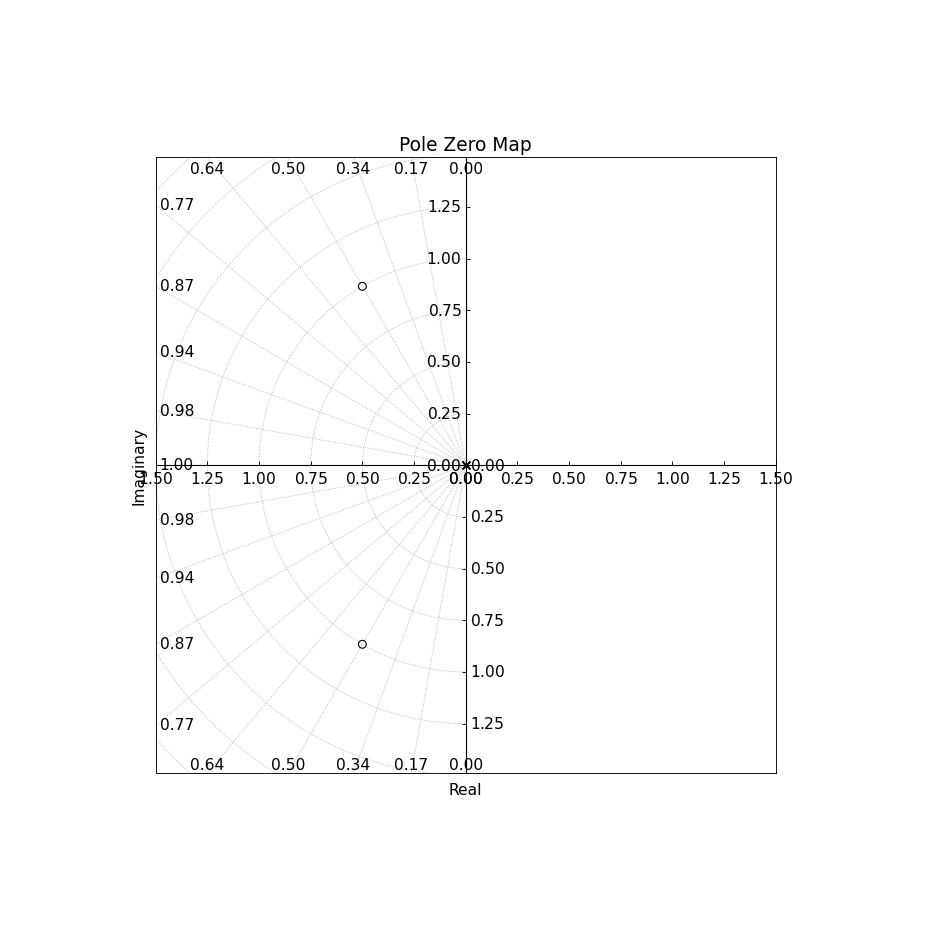

In [26]:
# Singularidades de h2
plt.figure(figsize=(10, 10), dpi=80)
control.pzmap(control.TransferFunction(num_z_moving_average_2, den_z_moving_average_2), grid = True)
plt.gca().set_xlim([-1.5,1.5])
plt.gca().set_ylim([-1.5,1.5])

# Ejercicio 3-b de la guia de TP5

## Filtro diferenciador

### Diferenciador de orden 1

$h_1(k) = (1, -1)$

$y[1] = x[1] -x[n-1]$

$Y(z) = X(z)(1-z^{-1})$

$H_1(z) = 1-z^{-1}$

$H_1(\Omega) = 1 - e^{-j\Omega} = e^{-j\frac{\Omega}{2}} \left(e^{j\frac{\Omega}{2}} - e^{-j\frac{\Omega}{2}}\right) = e^{-j\frac{\Omega}{2}} 2j\sin{\frac{\Omega}{2}} = e^{j\left(\frac{\pi}{2}-\frac{\Omega}{2}\right)} 2\sin{\frac{\Omega}{2}}$

Retardo de grupo

$\tau_1 = \frac{\partial{\phi}}{\partial{\Omega}} = -\frac{1}{2}$

El retardo de este diferenciado es media muestra, no es un valor deseado, ya que el retardo estara en una muestra o en la siguiente generando distorsion.

#### Comportamiento como diferenciador ideal

Diferenciador ideal

$H_i(\Omega) = \Omega$

$0.05 = \mid\frac{\mid H_i(\Omega)\mid - \mid H_1(\Omega)\mid}{\mid H_i(\Omega)\mid}\mid = \mid \frac{\Omega - 2\sin{\frac{\Omega}{2}}}{\Omega} \mid$

$0.95\Omega = 2\sin{\frac{\Omega}{2}}$

$0.475\Omega = \sin{\frac{\Omega}{2}}$

Hasta este punto el diferenciador se comportara como uno ideal.


### Diferenciador de orden 2

$h_2(k) = (1, 0, -1)$

$y[2] = x[2] -x[n-2]$

$Y(z) = X(z)(1-z^{-2})$

$H_2(z) = 1-z^{-2}$

$H_2(\Omega) = 1 - e^{-j2\Omega} = e^{-j\Omega} \left(e^{j\Omega} - e^{-j\Omega}\right) = e^{j\left(\frac{\pi}{2}-\Omega\right)} 2\sin{\frac{\Omega}{2}}$

$\tau_1 = \frac{\partial{\phi}}{\partial{\Omega}} = -1$

El retardo de grupo es una muestra.

#### Comportamiento como diferenciador ideal

Diferenciador ideal

$H_i(\Omega) = \Omega$

$0.05 = \mid\frac{\mid H_i(\Omega)\mid - \mid H_2(\Omega)\mid}{\mid H_i(\Omega)\mid}\mid = \mid \frac{\Omega - 2\sin{\Omega}}{\Omega} \mid$

$0.95\Omega = 2\sin{\Omega}$

$0.475\Omega = \sin{\Omega}$

Hasta este punto el diferenciador se comportara como uno ideal.


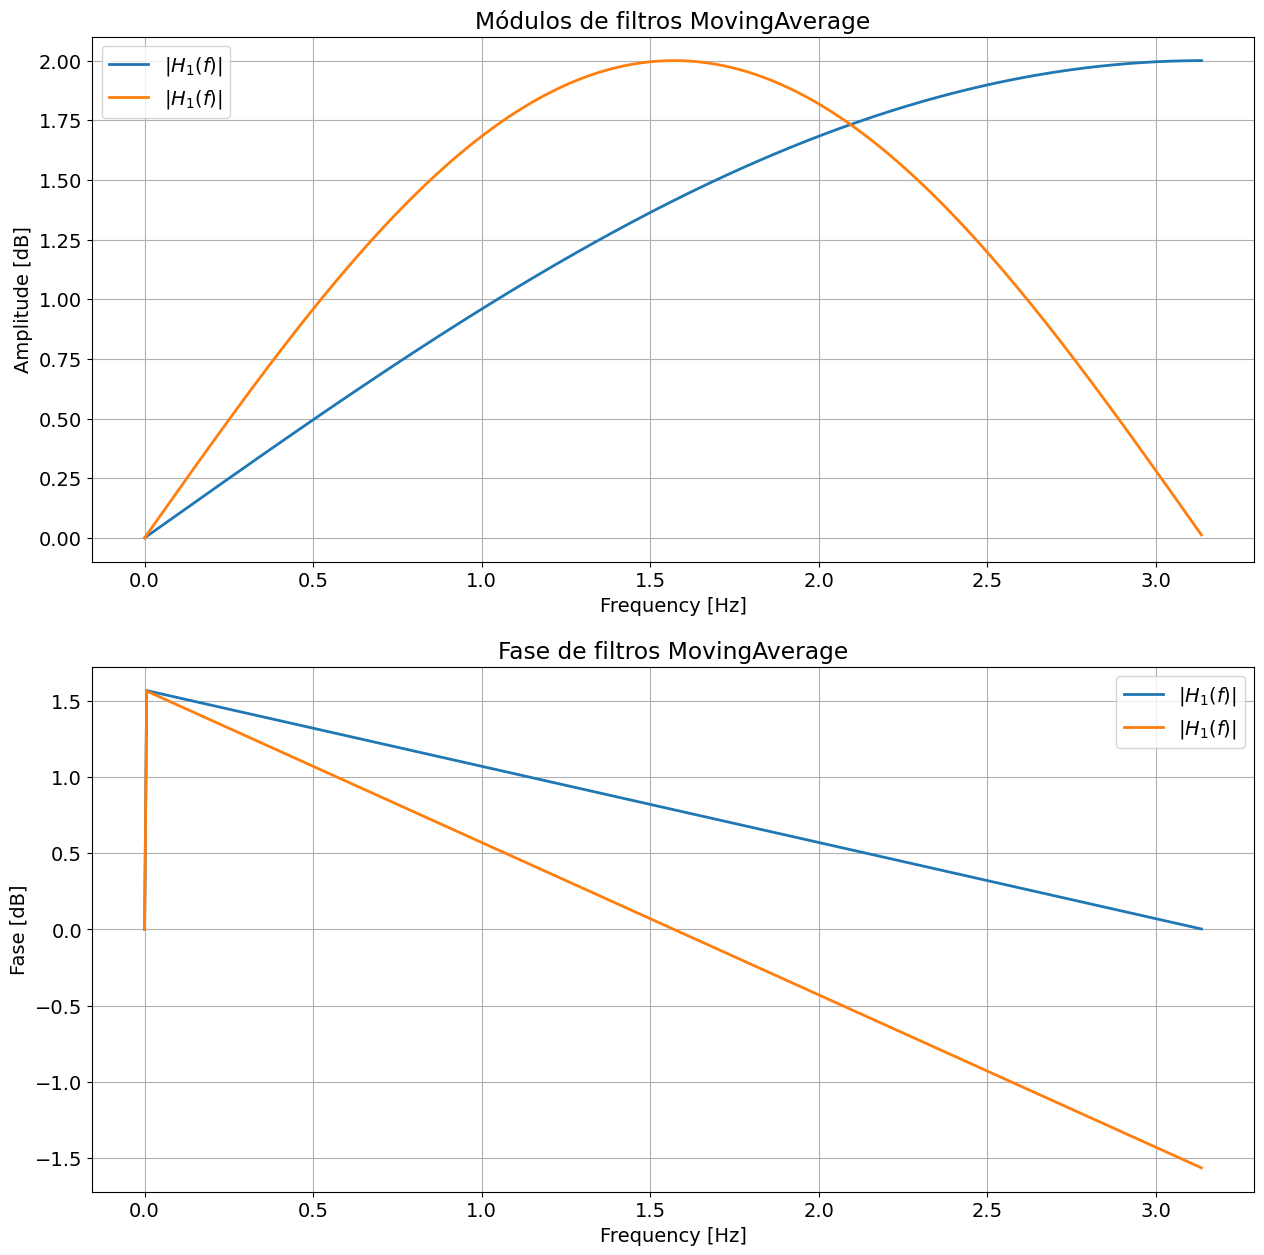

In [30]:
# Ejercicio Numero 3b
num_dif_a = [1, -1]
den_dif_a = [1, 0]
wz_dif_a, hz_dif_a = sig.freqz(num_dif_a, den_dif_a)

num_dif_b = [1, 0, -1]
den_dif_b = [1, 0, 0]
wz_dif_b, hz_dif_b = sig.freqz(num_dif_b, den_dif_b)

fig_3, ax_3 = plt.subplots(2,1,figsize=(15, 15))
ax_3[0].set_title('Módulos de filtros MovingAverage')
ax_3[0].plot(wz_dif_a, (abs(hz_dif_a)), linewidth=2.0, label = r'$|H_1(f)|$')
ax_3[0].plot(wz_dif_b, (abs(hz_dif_b)), linewidth=2.0, label = r'$|H_1(f)|$')
ax_3[0].set_ylabel('Amplitude [dB]')
ax_3[0].set_xlabel('Frequency [Hz]')
ax_3[0].legend()
ax_3[0].grid()

ax_3[1].set_title('Fase de filtros MovingAverage')
ax_3[1].plot(wz_dif_a, (np.angle(hz_dif_a)), linewidth=2.0, label = r'$|H_1(f)|$')
ax_3[1].plot(wz_dif_b, (np.angle(hz_dif_b)), linewidth=2.0, label = r'$|H_1(f)|$')
ax_3[1].set_ylabel('Fase [dB]')
ax_3[1].set_xlabel('Frequency [Hz]')
ax_3[1].legend()
ax_3[1].grid()

(-1.5, 1.5)

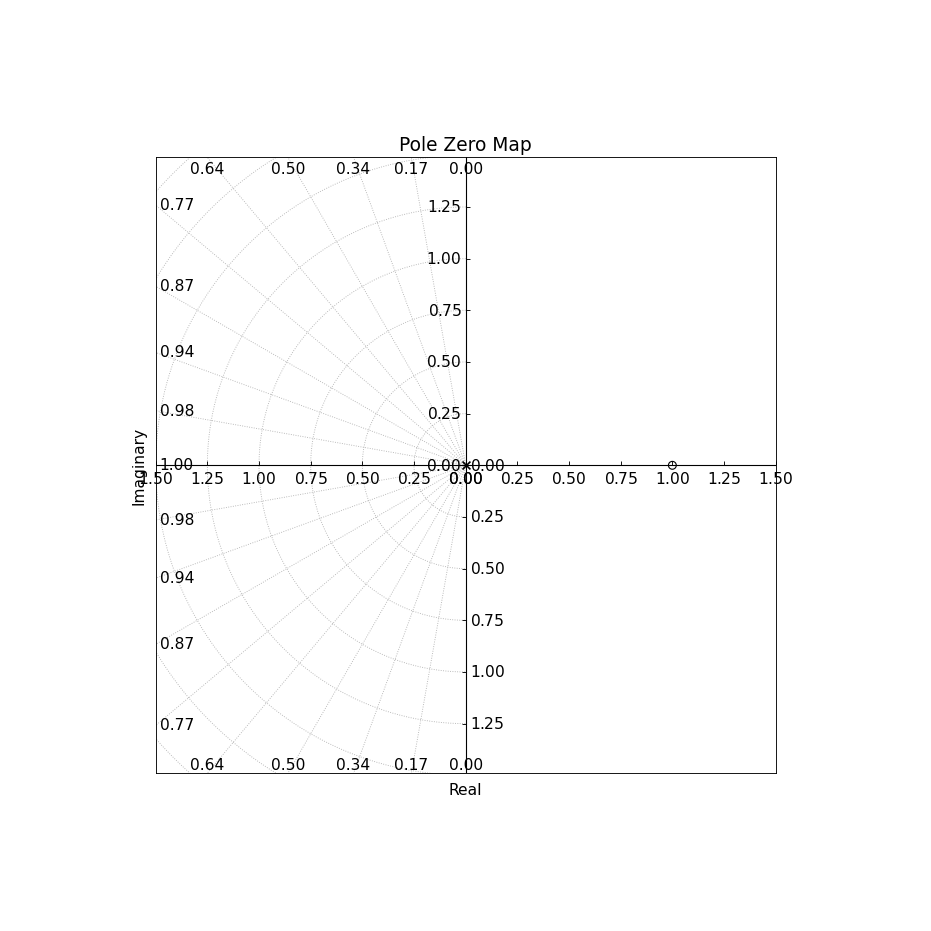

In [32]:
# Singularidades de hb1
plt.figure(figsize=(10, 10), dpi=80)
control.pzmap(control.TransferFunction(num_dif_a, den_dif_a), grid = True)
plt.gca().set_xlim([-1.5,1.5])
plt.gca().set_ylim([-1.5,1.5])

(-1.5, 1.5)

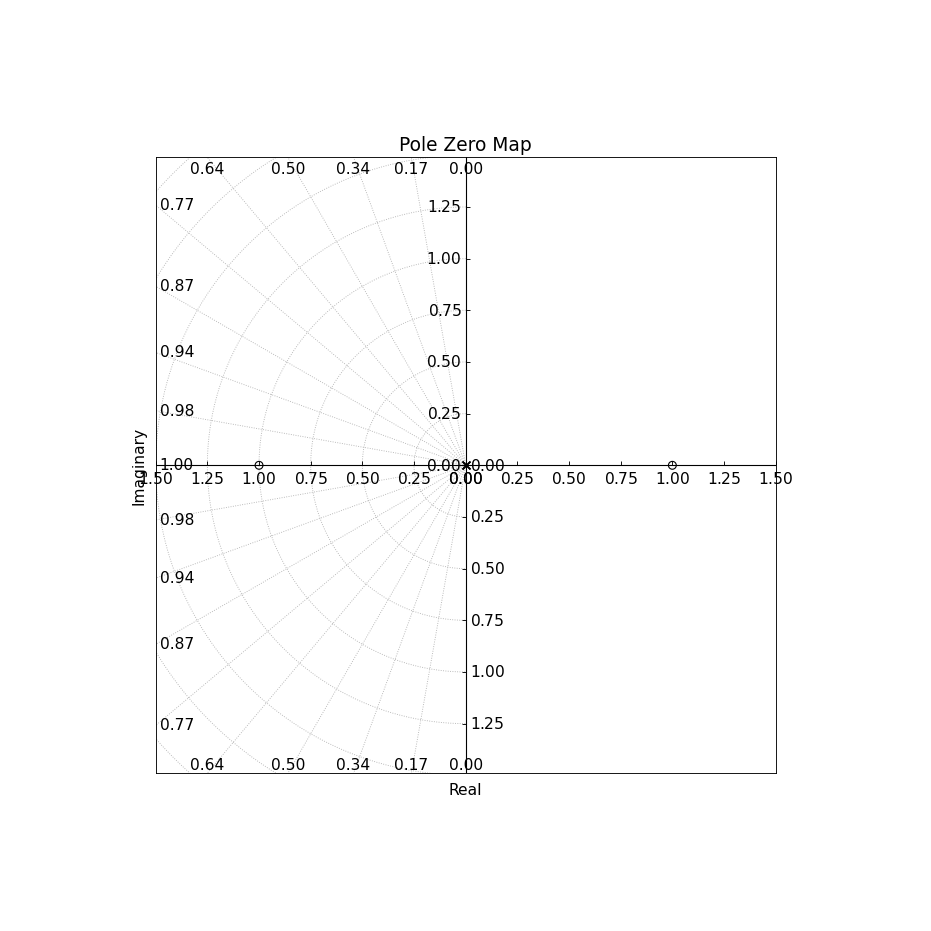

In [33]:
# Singularidades de hb2
plt.figure(figsize=(10, 10), dpi=80)
control.pzmap(control.TransferFunction(num_dif_b, den_dif_b), grid = True)
plt.gca().set_xlim([-1.5,1.5])
plt.gca().set_ylim([-1.5,1.5])

# Ejercio 2 TS8

## Filtro Pasa todo

<img src="./assets/sch_4.png" align="center" width="300" />

$X(z)z^{-M} + \left( X(z) - Y(z)z^{-M} \right) a = Y(z)$

$X(z)z^{-M} +  X(z) a = Y(z) + Y(z)z^{-M} a$

$X(z) \left( z^{-M} + a \right ) = Y(z) \left( 1 + z^{-M} a \right)$

$H(z) = /frac{a + z^{-M}}{1 + az^{-M}}= \frac{az^M + 1}{z^M + a}$

Para nuestro ejemplo:

$a = 0.8$

$M = 2$

$H(z) =\frac{0.8z^2 + 1}{z^2 + 0.8}$


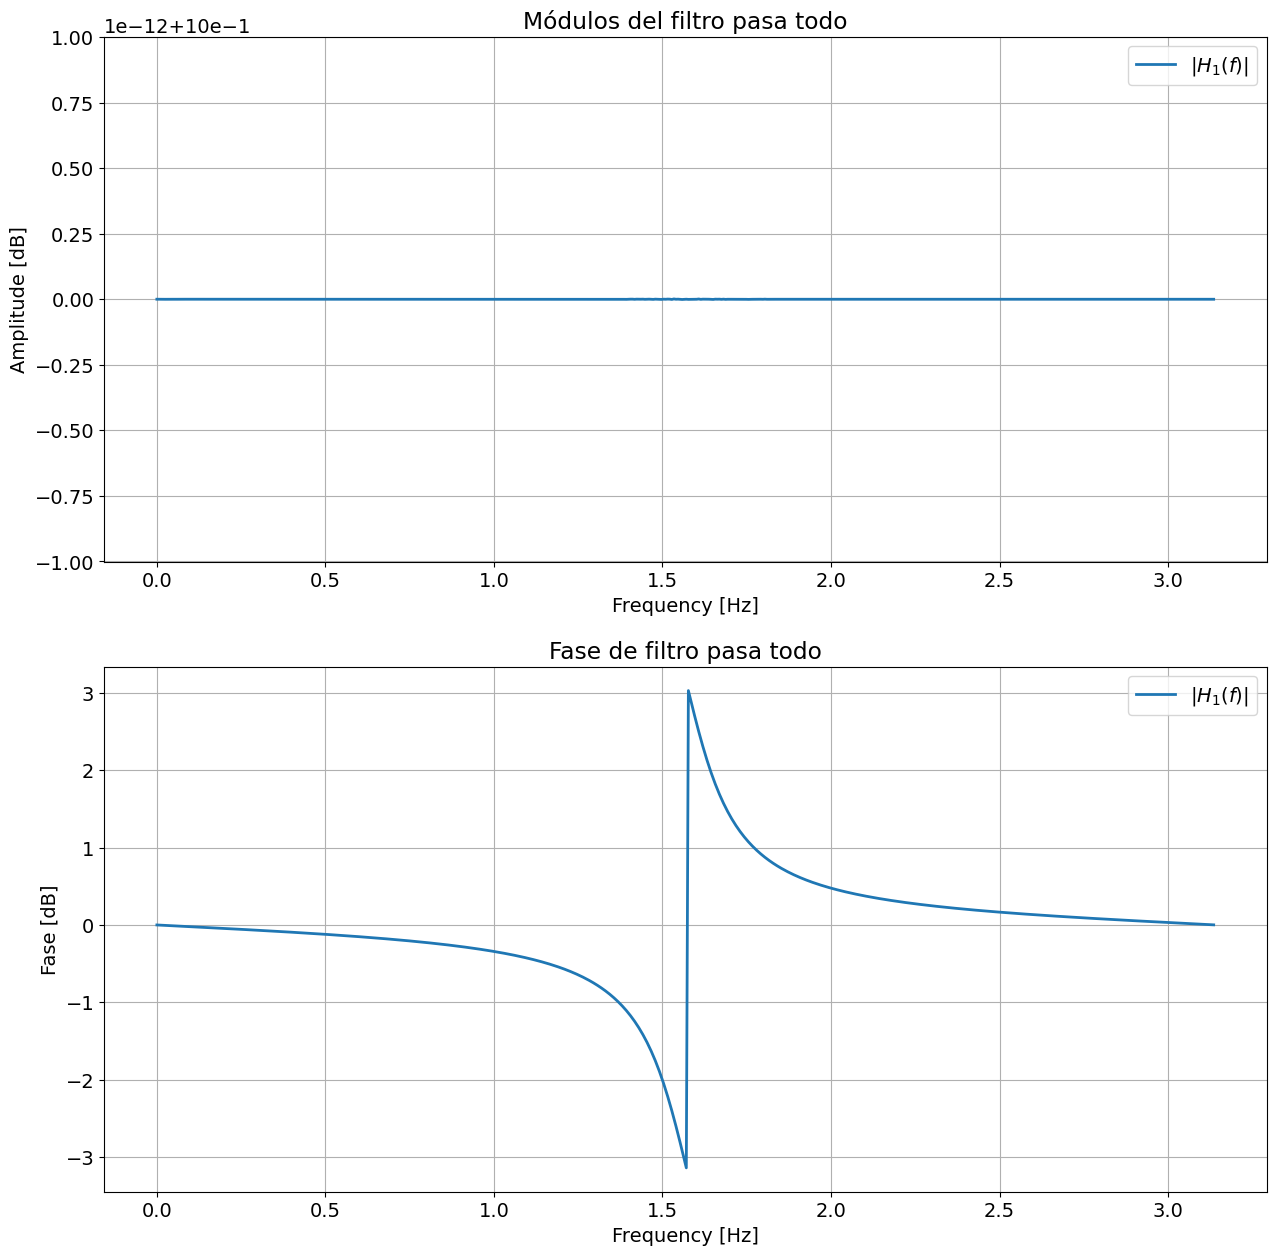

In [64]:
num_4 = [0.8, 0,    1]
den_4 = [  1, 0, 0.8]
wz_4, hz_4 = sig.freqz(num_4, den_4)

fig_4, ax_4 = plt.subplots(2,1,figsize=(15, 15))
ax_4[0].set_title('Módulos del filtro pasa todo')
ax_4[0].plot(wz_4, (abs(hz_4)), linewidth=2.0, label = r'$|H_1(f)|$')
ax_4[0].set_ylabel('Amplitude [dB]')
ax_4[0].set_xlabel('Frequency [Hz]')
ax_4[0].legend()
ax_4[0].grid()

ax_4[1].set_title('Fase de filtro pasa todo')
ax_4[1].plot(wz_4, (np.angle(hz_4)), linewidth=2.0, label = r'$|H_1(f)|$')
ax_4[1].set_ylabel('Fase [dB]')
ax_4[1].set_xlabel('Frequency [Hz]')
ax_4[1].legend()
ax_4[1].grid()

(-1.5, 1.5)

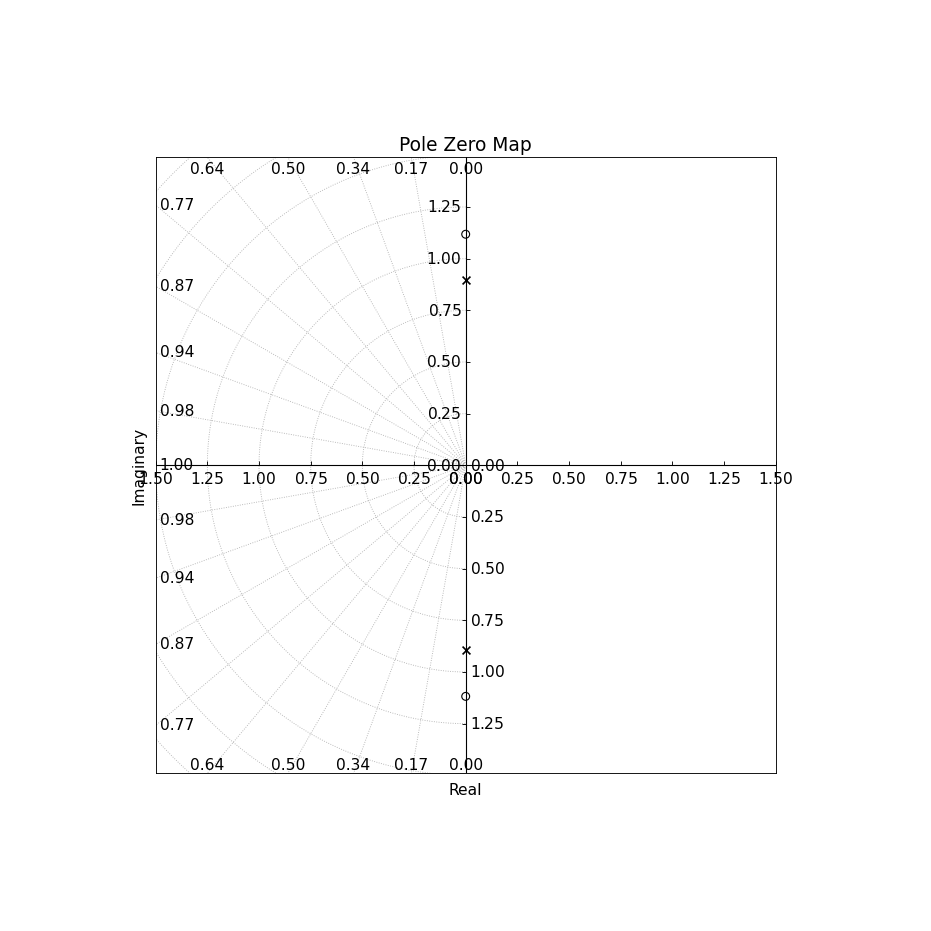

In [72]:
plt.figure(figsize=(10, 10), dpi=80)
control.pzmap(control.TransferFunction(num_4, den_4), grid = True)
plt.gca().set_xlim([-1.5,1.5])
plt.gca().set_ylim([-1.5,1.5])